In [27]:
#extracting the images
images_zip_path = 'training_images.zip'


with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

<b> 1. Read/import images from folder ‘training_images’.

In [28]:
img_dir = "training_images/"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images.

In [29]:
file_name = next(os.walk(img_dir))[2]

In [30]:
haar_df = pd.DataFrame(columns=['x','y','w','h','Total_Faces','Image_Name'])
haar_df

,x,y,w,h,Total_Faces,Image_Name


### Bounding Box parameters are `x`:52, `y`:133, `width`:428, `height`:428

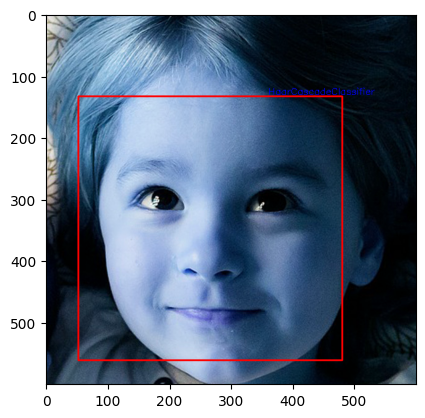

In [31]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

test_img = cv2.imread(os.path.join(img_dir, file_name[45]))
grey = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(grey, scaleFactor = 1.1, minNeighbors = 4)

for (x, y, w, h) in faces:
  cv2.rectangle(test_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
  cv2.putText(test_img, "HaarCascadeClassifier", (int((x+w)*0.75),y-3),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255))

# Display the output
display(Markdown(f"### Bounding Box parameters are `x`:{x}, `y`:{y}, `width`:{w}, `height`:{h}"))
plt.imshow(test_img)

In [32]:
haar_undetected_images = []
haar_detected_images = []

for i in range (len(file_name)):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    data_path = os.path.join(img_dir, file_name[i])
    img = cv2.imread(data_path)
    faces = face_cascade.detectMultiScale(img, scaleFactor = 1.05, minNeighbors = 5)

    j=0 

    # Find coordinates of the face
    for x,y,w,h in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)
        j = j + 1
    resized = cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0])))
    
    length = len(faces)
    if length == 0:
        haar_undetected_images.append(data_path)
        temp_dict = {'x':0, 
                 'y':0, 
                 'w':-1,
                 'h':-1, 
                 'Total_Faces':0,
                 'Image_Name': data_path} 
        
    else:
        haar_detected_images.append(data_path)
        for (x,y,w,h) in faces:
            temp_dict = {'x':x, 
                        'y':y, 
                        'w':w,
                        'h':h, 
                        'Total_Faces':len(faces),
                        'Image_Name':data_path} 
            temp_df = pd.DataFrame(temp_dict.values()).T
            temp_df.columns = ['x','y','w','h','Total_Faces','Image_Name']
            haar_df = pd.concat([haar_df, temp_df], ignore_index=True, axis = 0)

<b>3. From the same loop above, extract metadata of the faces and write into a DataFrame.

In [33]:
haar_df = pd.DataFrame(columns=['x','y','w','h','Total_Faces','Image_Name'])
haar_df

haar_undetected_images = []
haar_detected_images = []

for i in range (len(file_name)):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    data_path = os.path.join(img_dir, file_name[i])
    img = cv2.imread(data_path)
    faces = face_cascade.detectMultiScale(img, scaleFactor = 1.05, minNeighbors = 5)

    j=0 

    # Find coordinates of the face
    for x,y,w,h in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)
        j = j + 1
    resized = cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0])))
    
    length = len(faces)
    if length == 0:
        haar_undetected_images.append(data_path)
        temp_dict = {'x':0, 
                 'y':0, 
                 'w':-1,
                 'h':-1, 
                 'Total_Faces':0,
                 'Image_Name': data_path} 
        
    else:
        haar_detected_images.append(data_path)
        for (x,y,w,h) in faces:
            temp_dict = {'x':x, 
                        'y':y, 
                        'w':w,
                        'h':h, 
                        'Total_Faces':len(faces),
                        'Image_Name':data_path}
            temp_df = pd.DataFrame(temp_dict.values()).T
            temp_df.columns = ['x','y','w','h','Total_Faces','Image_Name']
            haar_df = pd.concat([haar_df, temp_df], ignore_index=True, axis = 0)

In [34]:
haar_df.head(3)

,x,y,w,h,Total_Faces,Image_Name
0,156,147,419,419,1,training_images/real_00001.jpg
1,81,141,434,434,1,training_images/real_00002.jpg
2,262,13,125,125,2,training_images/real_00003.jpg


<b> 4. Save the output Dataframe in .csv format.

In [35]:
haar_df.to_csv('entertainment.csv', index= False)

<b>1. Unzip, read and Load data(‘PINS.zip’) into session.

In [36]:
#unzipping
images_zip_path = 'PINS.zip'

with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

In [37]:
#Lets create functions that will read the image files from extracted zip and put them all in PINS(use the name of folder as metadata):
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS/')

In [38]:
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [39]:
#loading the image
load_image(metadata[0].image_path())

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

<b>3. Write a loop to iterate through each and every image and create metadata for all the images.

In [40]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS/')

In [41]:
metadata

array([PINS/pins_Aaron Paul\Aaron Paul0_262.jpg,
       PINS/pins_Aaron Paul\Aaron Paul101_247.jpg,
       PINS/pins_Aaron Paul\Aaron Paul101_248.jpg, ...,
       PINS/pins_zendaya\zendaya97.jpg, PINS/pins_zendaya\zendaya98.jpg,
       PINS/pins_zendaya\zendaya99.jpg], dtype=object)

<b>4. Generate Embeddings vectors on the each face in the dataset.

In [43]:
# Define VGG_FACE_MODEL architecture
backend.clear_session()
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))	
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
#getting vgg_face_descriptor
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [45]:
#embeddings for images
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    try:
        img = load_image(m.image_path())
        # scale RGB values to interval [0,1]
        img = cv2.resize(img, dsize = (224,224))
        img = (img / 255.).astype(np.float32)
        # obtain embedding vector for image
        embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except Exception as e:
        print(str(e))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━

<b>5. Build distance metrics for identifying the distance between two similar and dissimilar images.

In [46]:
def distance(emb0, emb1):
    return np.sum(np.square(emb0 - emb1))

def calc_dist(idx0, idx1):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx0], embeddings[idx1]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx0].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx1].image_path()));  

#plotting images and seeing distance between them
<br>3, 4 and 3, 190
<br>33, 34 and 33, 300
<br>20, 21 and 20, 115

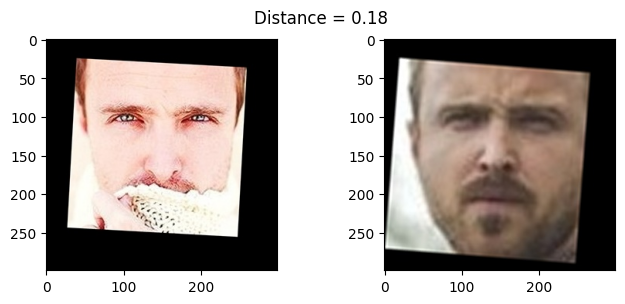

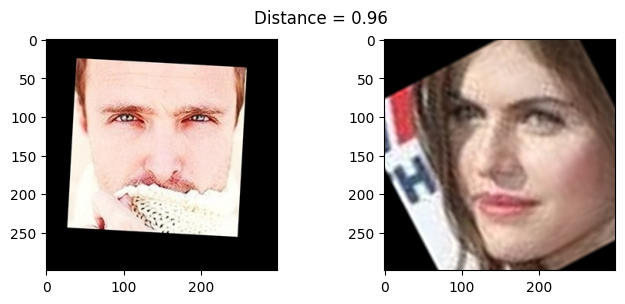

In [47]:
calc_dist(3, 4)
calc_dist(3, 190)

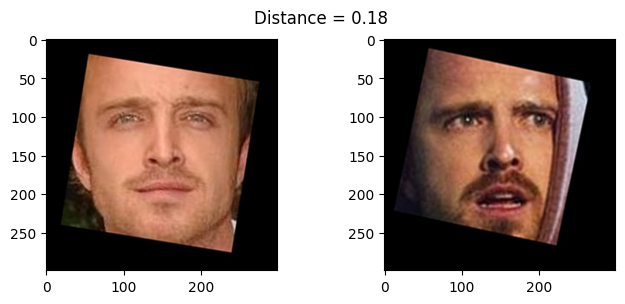

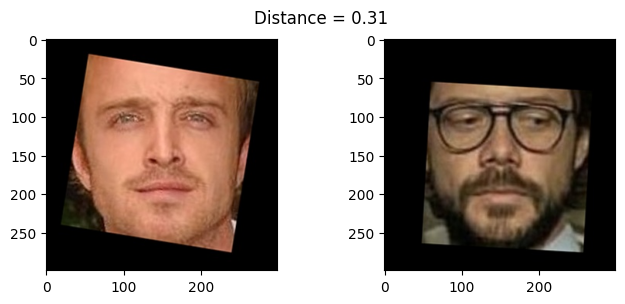

In [48]:
calc_dist(33, 34)
calc_dist(33, 300)

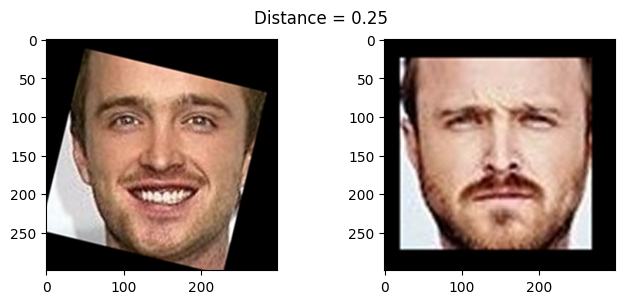

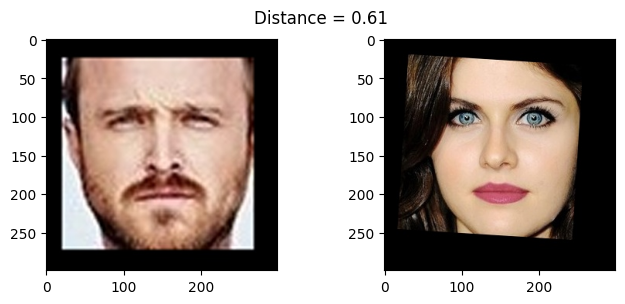

In [49]:
calc_dist(20, 21)
calc_dist(21, 115)

<b>6. Use PCA for dimensionality reduction.

In [74]:
#divind into train and test
x_train, x_test, y_train, y_test = train_test_split(embeddings, np.array([m.name for m in metadata]), test_size=.30, random_state=1)


#encoding the actor name
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

#Standardizing
x_train_scaled = zscore(x_train)
x_test_scaled = zscore(x_test)

#pca for features reduction
pca = PCA(n_components=128, svd_solver='randomized', whiten=True)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

<b>7. Build an SVM classifier in order to map each image to its right person.

In [77]:
svm = SVC()
svm.fit(x_train_pca, y_train)
svm.score(x_test_pca, y_test)

0.9603837821108017

<b>8. Import and display the the test images.

In [79]:
dj = load_image('Dwayne Johnson4.jpg')
bc = load_image('Benedict Cumberbatch9.jpg')

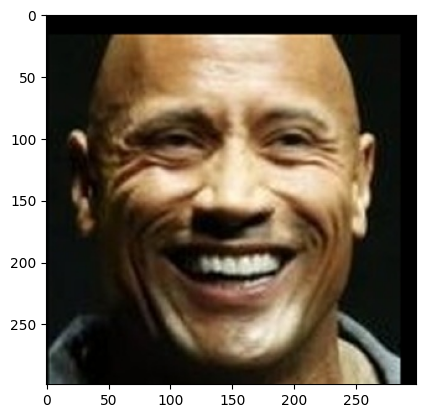

In [80]:
plt.imshow(dj)

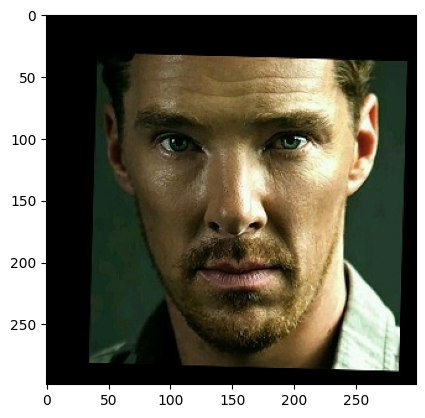

In [81]:
plt.imshow(bc)

<b>9. Use the trained SVM model to predict the face on both test images.

In [108]:
#transforming the image so that model understands it for Dwayne
dj = cv2.resize(dj, dsize = (224,224))
dj = (dj / 255.).astype(np.float32)
dj_embed = vgg_face_descriptor.predict(np.expand_dims(dj, axis=0))[0]

#preditct
pred_dj = svm.predict(pca.transform([zscore(dj_embed)]))
print("The picture is of - ", encoder.inverse_transform(pred_dj)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The picture is of -  pins_Dwayne Johnson


In [109]:
#transforming the image so that model understands it for Benedict
bc = cv2.resize(bc, dsize = (224,224))
bc = (bc / 255.).astype(np.float32)
bc_embed = vgg_face_descriptor.predict(np.expand_dims(bc, axis=0))[0]

#preditct
svm.predict(pca.transform([zscore(bc_embed)]))
pred_bc = svm.predict(pca.transform([zscore(bc_embed)]))
print("The picture is of - ", encoder.inverse_transform(pred_bc)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


The picture is of -  pins_Benedict Cumberbatch
